**Question 1**


In [2]:
tolerance = 1e-8


def seq1(k):
  return (1+0.005)**(-(2^k))

prev = seq1(0)
current = seq1(1)
k = 2
while abs(current - prev) > tolerance:
  prev= current
  current = seq1(k)
  k += 1
print("Seq 1 converges to",seq1(k)," and time for convergence k is", k)

Seq 1 converges to 1.9903316853638217e-06  and time for convergence k is 2634


In [3]:
tolerance = 1e-8


def seq2(k):
  return (1+0.005**k)

prev = seq2(0)
current = seq2(1)
k = 2
while abs(current - prev) > tolerance:
  prev= current
  current = seq2(k)
  k += 1

print("Seq 2 converges to",seq1(2)," and time for convergence k is", k)

Seq 2 converges to 1.0  and time for convergence k is 6


In [4]:
tolerance = 1e-8

def seq3(k):
  return (1+(0.005**(-k)))

prev = seq3(0)
current = seq3(1)
k = 2
while abs(current - prev) > tolerance:
  prev= current
  current = seq3(k)
  k += 1
print("Series is divergent")
print("Seq 3 converges to",seq1(3)," and time for convergence k is", k)

OverflowError: (34, 'Numerical result out of range')

In [5]:
tolerance = 1e-8

def seq4(k):
  return (1+(k**(-k)))

for k in range(2,100):
  print(seq4(k))
print("Seq 3 converges to",seq1(4)," and time for convergence k is", k)

1.25
1.037037037037037
1.00390625
1.00032
1.0000214334705075
1.000001214265679
1.0000000596046448
1.0000000025811748
1.0000000001
1.000000000003505
1.0000000000001121
1.0000000000000033
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
Seq 3 converges to 0.9705180779696579  and time for convergence k is 99


converging to 1.

#Exercise 3.2: Data Preparation Exercise (PREP)#

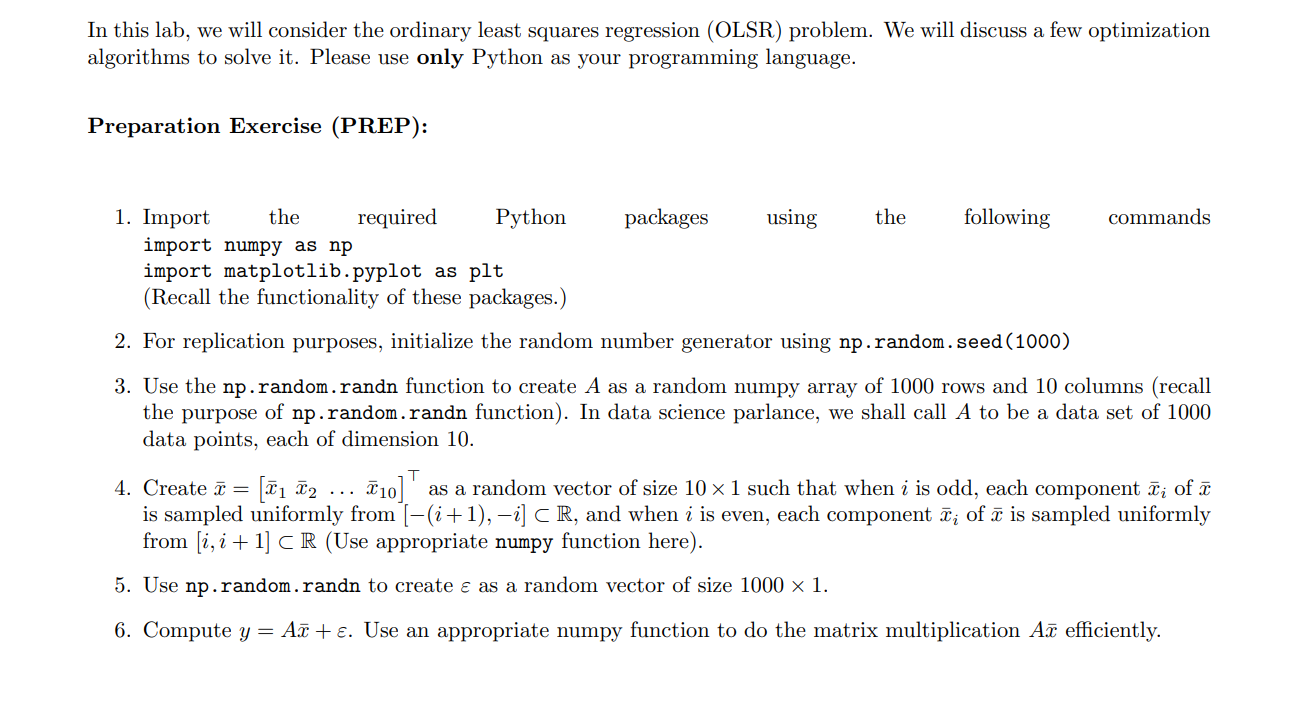

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns
import time

In [6]:
np.random.seed(1000)
A = []
for i in range(1000):
  row = []
  for j in range(10):
    row.append(np.random.randn())
  A.append(row)
A = np.array(A)
A.shape

(1000, 10)

In [7]:
xbar = []
for i in range(1,11):
  if i%2 == 1 :
    xbar.append(np.random.uniform(-(i+1), -i))
  else:
    xbar.append(np.random.uniform(i, i+1))
xbar = np.array(xbar)
xbar.shape

(10,)

In [9]:
ep = np.array([np.random.randn() for i in range(1000)])

In [10]:
y = A@xbar + ep

image.png

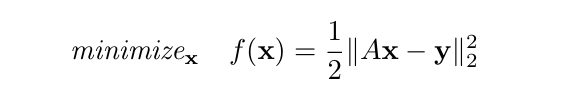

Note that $f(x) = \frac{1}{2}\|Ax-y\|_2^2$

$⇒\nabla_x{f(x)} = A^TAx - A^Ty$

$\nabla_x^2{f(x)} = A^TA$

In [17]:
def fx(x):
  return 0.5*(norm(A@x-y)**2)

def grad_fx(x):
  return np.dot(A.transpose(), A)@x - A.transpose()@y

def hessian_fx():
  return A.transpose()@A

def dk_fx():
  return np.linalg.inv(hessian_fx())

def get_alpha_newton(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -grad_fx(xk)
  while fx(xk + alpha*Dk@pk) > (fx(xk) + gamma*alpha*grad_fx(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha
import time
def newton_method_with_backtracking(x0, tau, alpha0, rho, gamma):
  xk = np.copy(x0)
  count = 0
  pk = grad_fx(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    Dk = dk_fx()
    alpha = get_alpha_newton(xk, alpha0, rho, gamma, Dk)
    xk = xk - alpha*Dk@pk
    pk = grad_fx(xk)
    xks.append(xk)
    count += 1
  return count, xk, fx(xk), xks


x0 = np.array([0 for _ in range(10)])
tau = 1e-4
alpha0 = 0.99
rho = 0.5
gamma = 0.5
start = time.time()
count2, final_xk2, final_val2, xks2= newton_method_with_backtracking(x0, tau, alpha0, rho, gamma)
newtontime = time.time() - start
print("Number of iteration is",count2,"Minimizer is", final_xk2,"Minimum value is",final_val2,"newton with backtracking")
print(xbar)


Number of iteration is 5 Minimizer is [-1.05303694  2.91643827 -3.31536238  4.61524384 -5.6946985   6.87219522
 -7.66188206  8.21815506 -9.27388142 10.00126012] Minimum value is 492.3087038856537 newton with backtracking
[-1.06258705  2.94307072 -3.34150552  4.58252615 -5.75947573  6.93512469
 -7.61893094  8.16818187 -9.2179964  10.00022174]


In [19]:
print(fx(final_xk2))
print(fx(xbar))

492.3087038856537
500.9931282066349


Text(0.5, 1.0, 'Plot of log norm of ||xbar-xk|| in iterations')

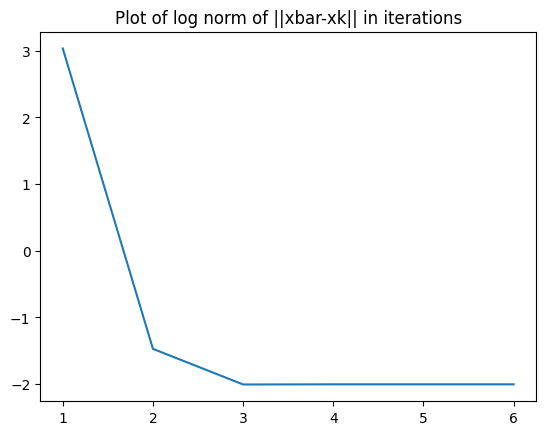

In [20]:
norms = [np.log(norm(xbar-xk)) for xk in xks2]
iterations = [i+1 for i in range(count2+1)]
plt.plot(iterations, norms)
plt.title("Plot of log norm of ||xbar-xk|| in iterations")

Text(0.5, 1.0, 'Plot of log absolute of function values difference vs iterations')

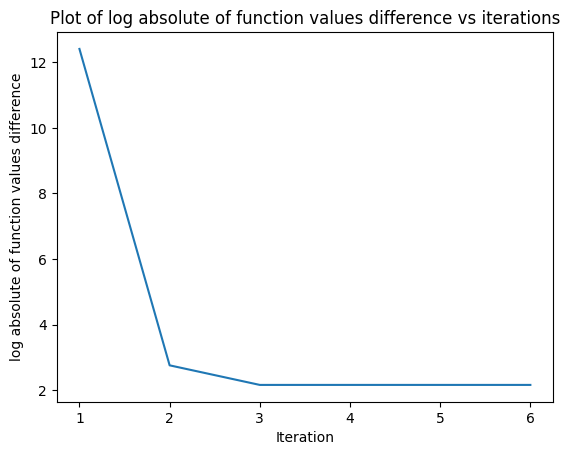

In [30]:
norms = [np.log(abs(fx(xbar)-fx(xk))) for xk in xks2]
iterations = [i+1 for i in range(count2+1)]
plt.plot(iterations, norms)
plt.xlabel("Iteration")
plt.ylabel("log absolute of function values difference")
plt.title("Plot of log absolute of function values difference vs iterations")

Newton's method offers quadratic convergence when the objective function is strongly convex, with the distance between iterates decreasing quadratically towards the solution. However, convergence can be slower in the presence of ill-conditioned Hessians or degenerate regions, potentially leading to oscillations. Moreover, divergence or convergence to saddle points may occur if the Hessian is not positive definite. In ideal settings with strong convexity and well-conditioned Hessians, Newton's method achieves quadratic convergence of objective function values, demonstrating a quadratic decrease in value with each iteration, reflecting the method's efficacy under favorable conditions.

In [24]:
def get_alpha_bfgs(xk, alpha0, rho, gamma, Bk):
  alpha = alpha0
  pk = -grad_fx(xk)
  while fx(xk + alpha*Bk@pk) > (fx(xk) + gamma*alpha*grad_fx(xk)@Bk@pk):
    alpha = rho*alpha
  return alpha


def bfgs(x0, tau, alpha0, rho, gamma, max_iter=500):
  xk = np.copy(x0)
  n = len(x0)
  Bk = np.eye(n)
  count = 0
  pk = grad_fx(xk)
  xks = []
  xks.append(xk)
  while (norm(pk)>tau):
    if count > max_iter:
      break

    alpha = get_alpha_bfgs(xk, alpha0, rho, gamma, Bk)
    xnext = xk - alpha*(Bk@pk)

    sk = xnext - xk
    yk = grad_fx(xnext) - grad_fx(xk)

    Bk = np.dot((np.eye(len(xk)) - np.outer(sk, yk) / np.dot(yk, sk)), np.dot(Bk, (np.eye(len(xk)) - np.outer(yk, sk) / np.dot(yk, sk)))) + np.outer(sk, sk) / np.dot(yk, sk)

    xk = xnext
    pk = grad_fx(xk)

    xks.append(xk)
    count += 1

  return count, xk, fx(xk), xks


alpha0 = 0.99
rho = 0.5
gamma = 0.5
tau = 1e-4
x0 = [0 for i in range(10)]
start = time.time()
count, minimizer, minimum, xks=bfgs(x0,tau, alpha0, rho, gamma)
bfgstime = time.time() - start
print("Nummber of iteration",count)
print("Minimizer is",minimizer[0:5],"Minimum value is",minimum," BFGS")




Nummber of iteration 17
Minimizer is [-1.05303694  2.91643829 -3.31536238  4.61524383 -5.6946985 ] Minimum value is 492.30870388565484  BFGS


In [25]:
print(xbar)

[-1.06258705  2.94307072 -3.34150552  4.58252615 -5.75947573  6.93512469
 -7.61893094  8.16818187 -9.2179964  10.00022174]


In [26]:
print(minimizer)

[-1.05303694  2.91643829 -3.31536238  4.61524383 -5.6946985   6.87219521
 -7.66188207  8.21815502 -9.27388141 10.00126011]



BFGS (Broyden-Fletcher-Goldfarb-Shanno) converges quickly, though not as rapidly as Newton's method. Unlike Newton, BFGS approximates the Hessian's inverse iteratively, bypassing the need for direct computation. This enhances efficiency, making BFGS an appealing optimization algorithm for large-scale problems.

In [28]:
norms = [np.log(norm(minimizer-xk)) for xk in xks]
iterations = [i+1 for i in range(count+1)]
plt.plot(iterations, norms)
plt.xlabel("Iteration")
plt.ylabel("log norm of ||xbar-xk|| ")
plt.title("Plot of log norm of ||xbar-xk|| in iterations")

<ipython-input-28-a7ecb3fb5868>:1: RuntimeWarning: divide by zero encountered in log
  norms = [np.log(norm(minimizer-xk)) for xk in xks]


Text(0.5, 1.0, 'Plot of log norm of ||xbar-xk|| in iterations')

<ipython-input-31-ee49d036c344>:1: RuntimeWarning: divide by zero encountered in log
  norms = [np.log(abs(fx(minimizer)-fx(xk))) for xk in xks]


Text(0.5, 1.0, 'Plot of log absolute of function values difference vs iterations')

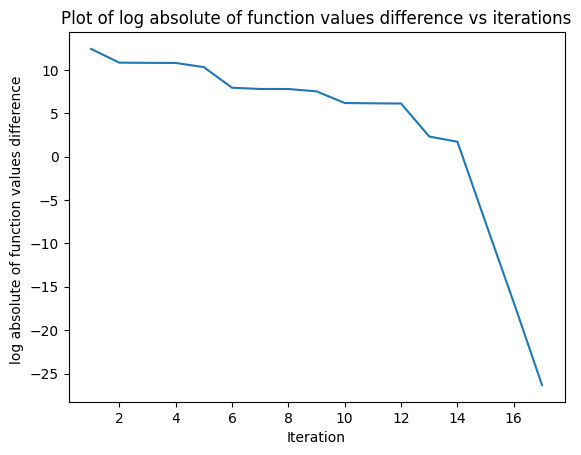

In [31]:
norms = [np.log(abs(fx(minimizer)-fx(xk))) for xk in xks]
iterations = [i+1 for i in range(count+1)]
plt.plot(iterations, norms)
plt.xlabel("Iteration")
plt.ylabel("log absolute of function values difference ")
plt.title("Plot of log absolute of function values difference vs iterations")

In linear regression, BFGS typically converges rapidly, producing a sequence of iterates that tend towards the optimal solution due to the problem's convex nature. Convergence towards the optimum is expected if the problem is well-conditioned and the objective function is smooth. BFGS may exhibit superlinear or quadratic convergence for the iterates sequence, especially with close initial guesses and well-behaved problems. The objective function in linear regression evaluates the discrepancy between predicted and actual values. BFGS minimizes this function, aiming to reduce prediction errors. Convergence of the objective function values relies on the iterates' convergence; as BFGS approaches the solution, objective function values should decrease iteratively. Convergence rate variability stems from factors like problem conditioning, regularization choice, and presence of outliers or noise. Overall, BFGS offers efficient convergence for linear regression optimization, provided certain conditions regarding problem characteristics are met.

Times for Newtons vs bfgs

In [32]:
print(f"Time Taken for Newton method  is {newtontime}")
print(f"Time taken for BFGS method is {bfgstime}")

Time Taken for Newton method  is 0.0019669532775878906
Time taken for BFGS method is 0.025667667388916016



BFGS typically requires more time to converge compared to Newton's method. While both algorithms aim for efficient optimization, Newton's method often achieves faster convergence due to its quadratic convergence properties, especially in well-conditioned problems. BFGS, although also efficient, involves iterative approximations of the Hessian matrix, leading to slower convergence rates in some cases. Thus, despite its effectiveness in convex problems like linear regression, BFGS may demand more computational time compared to Newton's method, making it a trade-off between speed and versatility in optimization tasks